In [13]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Unzip the image dataset

# Just run once

'''
%cd /content
!gdown --id '13shxKy6WSeAa7dPhccnSG9aoFZ76lVPT' --output fairface-img-margin025-trainval.zip
!unzip fairface-img-margin025-trainval.zip

In [2]:
# Download the csv label file for the subset

# Just run once

'''
%cd /content
!gdown --id '1bwKY_aVMRIQ_IcrFnpsTG-E3ZE7iAM8t' --output fairface_subset.csv

/content
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bwKY_aVMRIQ_IcrFnpsTG-E3ZE7iAM8t
To: /content/fairface_subset.csv
100% 279k/279k [00:00<00:00, 89.7MB/s]


In [5]:
# Load labels
file_path = 'fairface_subset.csv'
labels_df = pd.read_csv(file_path)

labels_df.shape

(6300, 5)

In [6]:
# Preprocess images
def load_and_preprocess_image(image_path):
  # Load image
  image = Image.open(image_path)
  image = image.resize((64, 64))

  # Convert to grayscale
  image = image.convert('L')

  # Convert to numpy array and flatten
  image_array = np.array(image).flatten()
  return image_array


images = [load_and_preprocess_image(f'{fname}') for fname in labels_df['file']]

In [9]:
# Create feature matrix X and labels y
X = np.stack(images, axis=0)
y = labels_df['gender'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Tree-based and Linear Models

## Tree-based models

In [14]:
# Use random forest model
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=False)
clf_rf.fit(X_train, y_train)
rf_predictions = clf_rf.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:" + str(np.round(clf_rf.score(X_test,y_test),3)))

Random Forest Performance:0.703


## Linear models

In [12]:
# Choose the best hyper-parameter I found in the previous check-in point
clf_linear = LogisticRegression(random_state=0, solver='saga', penalty='l1', C=0.01, max_iter=50)

# Fit the model to the training data
clf_linear.fit(X_train, y_train)

# Get the score
clf_linear.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7357142857142858

# Re-calculate Model Performance Using Different Evaluation Metrics

## Precision/Recall/F1

In [19]:
from sklearn.metrics import classification_report

# For the tree-based model
preds_rf = clf_rf.predict(X_test)
report_rf = classification_report(y_test, preds_rf, target_names=['Female', 'Male'])  # Adjust target names accordingly
print("Random Forest Classification Report")
print(report_rf)

# For the linear model
preds_linear = clf_linear.predict(X_test)
report_linear = classification_report(y_test, preds_linear, target_names=['Female', 'Male'])  # Adjust target names accordingly
print("\nLogistic Regression Classification Report")
print(report_linear)

Random Forest Classification Report
              precision    recall  f1-score   support

      Female       0.70      0.70      0.70       624
        Male       0.71      0.70      0.71       636

    accuracy                           0.70      1260
   macro avg       0.70      0.70      0.70      1260
weighted avg       0.70      0.70      0.70      1260


Logistic Regression Classification Report
              precision    recall  f1-score   support

      Female       0.73      0.73      0.73       624
        Male       0.74      0.74      0.74       636

    accuracy                           0.74      1260
   macro avg       0.74      0.74      0.74      1260
weighted avg       0.74      0.74      0.74      1260



## Confusion Matrix

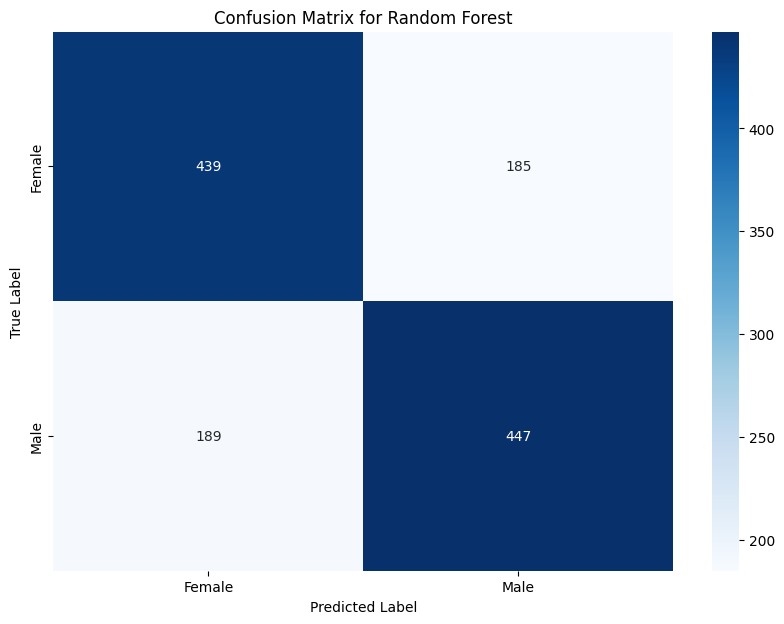

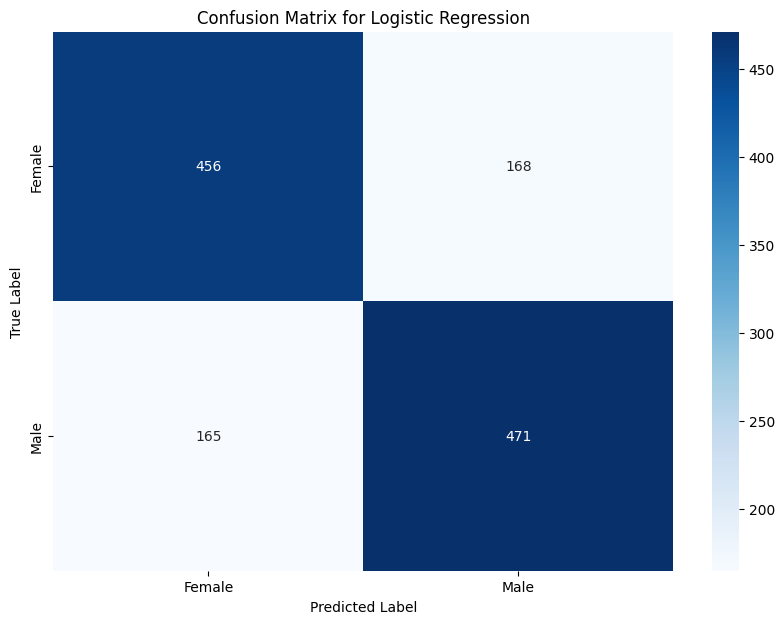

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For the tree-based model
preds_rf = clf_rf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, preds_rf)

# Plotting the confusion matrix for the tree-based model
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix for Random Forest")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# For the linear model
preds_linear = clf_linear.predict(X_test)
conf_matrix_linear = confusion_matrix(y_test, preds_linear)

# Plotting the confusion matrix for the linear model
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Interpret Model Performance

## Random Forest Classification Report:
+ Precision, Recall, and F1-Score: The Random Forest model has similar precision, recall, and F1-scores for both classes ('Female' and 'Male'). This indicates a balanced performance across the classes.
+ Accuracy: The overall accuracy is 0.70, which means that 70% of the predictions made by the model were correct.

## Logistic Regression Classification Report:
+ Precision, Recall, and F1-Score: The Logistic Regression model shows slightly higher precision, recall, and F1-scores compared to the Random Forest model. This suggests that the Logistic Regression may be a bit better at distinguishing between the 'Female' and 'Male' classes.
+ Accuracy: The overall accuracy is 0.74, which is slightly higher than the Random Forest model, indicating that Logistic Regression has a slight edge in the overall correct predictions.

## Advantages and Disadvantages:
+ Random Forest:
  + Advantages:
    + Capable of modeling complex relationships due to the ensemble of decision trees.
    + Usually has good performance without the need for extensive data preprocessing, such as normalization.
    + Less likely to overfit compared to individual decision trees.
  + Disadvantages:
    + More computationally intensive to train due to the ensemble of trees.
    + Model interpretability is lower than logistic regression; it's harder to understand the relationship between input variables and the prediction.
+ Logistic Regression:
  + Advantages:
    + It is a simple model that is easy to implement, interpret, and explain.
    + Training is usually faster compared to Random Forest.
    + Works well when the relationship between the features and the target is approximately linear.
  + Disadvantages:
    + May underperform if the relationship between features and the target is highly non-linear or complex.
    + Requires careful feature selection and preprocessing to perform at its best.

## Interpretation:
+ The Logistic Regression model is performing slightly better than the Random Forest model in this case. This could be due to several reasons, such as:
 + The relationship between the features and the target might be closer to linear, which logistic regression can capture better.
 + The dataset might not have complex interactions and nonlinearities that Random Forest can exploit.
 + It's also possible that the hyperparameters for the Random Forest are not well-tuned, leading to suboptimal performance.


# Apply GridSearchCV for Hyperparameter Tuning

## Random Forest

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_


Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [29]:
print(best_params_rf)
print(best_score_rf)

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
0.697420634920635


This score is lower than the score above (0.703) - so I will just stick to the original hyperparameters (n_estimators=100, random_state=42, bootstrap=False)

## Linear Model

In [32]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for LogisticRegression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga', 'liblinear'],
    'max_iter': [100, 1000, 2000]
}

# Initialize the LogisticRegression
lr = LogisticRegression(random_state=42)

# Initialize the GridSearchCV object
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_


Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

I failed to run the code above - seems like it would take hours (maybe because there're too many features in the image dataset).

I'm glad that I just found the best parameter before in P.2.2. I will use the (random_state=0, solver='saga', penalty='l1', C=0.01, max_iter=50) to validate the model performance.

# Apply KFold Cross Validation

## Random Forest

In [30]:
from sklearn.model_selection import cross_val_score, KFold

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Setup KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_rf = cross_val_score(clf_rf, X, y, cv=kf, scoring='accuracy')

# Print the average of the cross-validation scores
print(f'Random Forest CV Accuracy: {cv_scores_rf.mean()} ± {cv_scores_rf.std()}')


Random Forest CV Accuracy: 0.6887301587301587 ± 0.011439589045541071


## Linear model

In [31]:
clf_linear = LogisticRegression(solver='saga', penalty='l1', C=0.01, max_iter=50, random_state=42)

# Perform cross-validation
cv_scores_linear = cross_val_score(clf_linear, X, y, cv=kf, scoring='accuracy')

# Print the average of the cross-validation scores
print(f'Logistic Regression CV Accuracy: {cv_scores_linear.mean()} ± {cv_scores_linear.std()}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression CV Accuracy: 0.7288888888888889 ± 0.007179798652634077


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Looks like linear model performs better!